In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt
from hdbscan import HDBSCAN 

In [2]:
### Faster
time_resolution = 30
time_window = 5

In [3]:
df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_tech_edgesize = pd.read_csv("../result_csv/tech_edgesize_smoothed"+str(time_resolution+time_window)+".csv")
df_social_edgesize = pd.read_csv("../result_csv/social_edgesize_smoothed"+str(time_resolution+time_window)+".csv")

all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

all_graduated = [x.lower() for x in all_graduated if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]
all_retired = [x.lower() for x in all_retired if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]

In [4]:
sustain_label_tech = []
for proj in df_tech_edgesize.columns :
    if proj.lower() in all_graduated:
        sustain_label_tech.append(100)
        continue
    elif proj.lower() in all_retired:
        sustain_label_tech.append(0)
        continue
    else:
        sustain_label_tech.append(-1)

sustain_label_social = []
for proj in df_social_edgesize.columns :
    if proj.lower() in all_graduated:
        sustain_label_social.append(100)
        continue
    elif proj.lower() in all_retired:
        sustain_label_social.append(0)
        continue
    else:
        sustain_label_social.append(-1)


In [5]:
pd.Series(sustain_label_tech).value_counts()

 100    189
 0       50
-1       19
dtype: int64

In [6]:
pd.Series(sustain_label_social).value_counts()

 100    189
 0       50
-1       33
dtype: int64

In [7]:
t = pd.DataFrame(sustain_label_tech).T
t.columns = df_tech_edgesize.columns
t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True)

/tmp/ipykernel_20736/2266264582.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True)


openwebbeans  jena  shindig  sanselan  skywalking  stdcxx  wave  tajo  \
0            100   100      100       100         100     100     0   100   
1            145    18      133         7        1019       9    28   674   
2            393     5      227       206         430      55    16   284   
3            199    17      308       101        1277      47     2   566   
4            129   208      243        26        1191      80     2   316   
..           ...   ...      ...       ...         ...     ...   ...   ...   
95            -1    -1       -1        -1          -1      -1    -1    -1   
96            -1    -1       -1        -1          -1      -1    -1    -1   
97            -1    -1       -1        -1          -1      -1    -1    -1   
98            -1    -1       -1        -1          -1      -1    -1    -1   
99            -1    -1       -1        -1          -1      -1    -1    -1   

    ratis  mrunit  ...  juice  muse  chemistry  beehive  reef  cayenne  ofbiz  \
0     100     100  ...      0   100        100      100   100      100    100   
1     667      30  ...      9    10        133      632  1131      375    754   
2     254       5  ...     -1   159         94      305   121      144    228   
3      80       1  ...     -1    26        135      880  2011      612   1135   
4      76       5  ...     -1   634         51      419   698      470    213   
..    ...     ...  ...    ...   ...        ...      ...   ...      ...    ...   
95     -1      -1  ...     -1    -1         -1       -1    -1       -1     -1   
96     -1      -1  ...     -1    -1         -1       -1    -1       -1     -1   
97     -1      -1  ...     -1    -1         -1       -1    -1       -1     -1   
98     -1      -1  ...     -1    -1         -1       -1    -1       -1     -1   
99     -1      -1  ...     -1    -1         -1       -1    -1       -1     -1   

    zipkin  subversion  cmda  
0        0         100    -1  
1        1         505   459  
2       40         345   808  
3       41          -1    -1  
4       32          -1    -1  
..     ...         ...   ...  
95      -1          -1    -1  
96      -1          -1    -1  
97      -1          -1    -1  
98      -1          -1    -1  
99      -1          -1    -1  

[100 rows x 258 columns]

In [8]:
df_tech_edgesize_groups = t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True).T

/tmp/ipykernel_20736/848246505.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tech_edgesize_groups = t.append(df_tech_edgesize, ignore_index=True).reset_index(drop=True).T


In [9]:
df_tech_edgesize_groups

0     1    2     3     4    5     6    7     8    9   ...  90  \
openwebbeans  100   145  393   199   129  183   188  247   200  259  ...  -1   
jena          100    18    5    17   208  258   288  306   975  648  ...  -1   
shindig       100   133  227   308   243  559   666  811   675  377  ...  -1   
sanselan      100     7  206   101    26   12     9    1    17   91  ...  -1   
skywalking    100  1019  430  1277  1191  456   933  465  2218  470  ...  -1   
...           ...   ...  ...   ...   ...  ...   ...  ...   ...  ...  ...  ..   
cayenne       100   375  144   612   470  390   111   -1    -1   -1  ...  -1   
ofbiz         100   754  228  1135   213  342    -1   -1    -1   -1  ...  -1   
zipkin          0     1   40    41    32   27  1340   -1    -1   -1  ...  -1   
subversion    100   505  345    -1    -1   -1    -1   -1    -1   -1  ...  -1   
cmda           -1   459  808    -1    -1   -1    -1   -1    -1   -1  ...  -1   

              91  92  93  94  95  96  97  98  99  
openwebbeans  -1  -1  -1  -1  -1  -1  -1  -1  -1  
jena          -1  -1  -1  -1  -1  -1  -1  -1  -1  
shindig       -1  -1  -1  -1  -1  -1  -1  -1  -1  
sanselan      -1  -1  -1  -1  -1  -1  -1  -1  -1  
skywalking    -1  -1  -1  -1  -1  -1  -1  -1  -1  
...           ..  ..  ..  ..  ..  ..  ..  ..  ..  
cayenne       -1  -1  -1  -1  -1  -1  -1  -1  -1  
ofbiz         -1  -1  -1  -1  -1  -1  -1  -1  -1  
zipkin        -1  -1  -1  -1  -1  -1  -1  -1  -1  
subversion    -1  -1  -1  -1  -1  -1  -1  -1  -1  
cmda          -1  -1  -1  -1  -1  -1  -1  -1  -1  

[258 rows x 100 columns]

In [10]:
df_tech_edgesize_graduated = df_tech_edgesize_groups.where(df_tech_edgesize_groups[0]==100).dropna()[range(1,99)]

In [11]:
df_tech_edgesize_graduated

1      2       3       4      5      6       7       8   \
openwebbeans   145.0  393.0   199.0   129.0  183.0  188.0   247.0   200.0   
jena            18.0    5.0    17.0   208.0  258.0  288.0   306.0   975.0   
shindig        133.0  227.0   308.0   243.0  559.0  666.0   811.0   675.0   
sanselan         7.0  206.0   101.0    26.0   12.0    9.0     1.0    17.0   
skywalking    1019.0  430.0  1277.0  1191.0  456.0  933.0   465.0  2218.0   
...              ...    ...     ...     ...    ...    ...     ...     ...   
beehive        632.0  305.0   880.0   419.0  214.0   -1.0    -1.0    -1.0   
reef          1131.0  121.0  2011.0   698.0  267.0  386.0  1499.0  1198.0   
cayenne        375.0  144.0   612.0   470.0  390.0  111.0    -1.0    -1.0   
ofbiz          754.0  228.0  1135.0   213.0  342.0   -1.0    -1.0    -1.0   
subversion     505.0  345.0    -1.0    -1.0   -1.0   -1.0    -1.0    -1.0   

                 9      10  ...   89   90   91   92   93   94   95   96   97  \
openwebbeans  259.0  270.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
jena          648.0  296.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
shindig       377.0  348.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
sanselan       91.0   15.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
skywalking    470.0  940.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
...             ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
beehive        -1.0   -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
reef          494.0  439.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
cayenne        -1.0   -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
ofbiz          -1.0   -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
subversion     -1.0   -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   

               98  
openwebbeans -1.0  
jena         -1.0  
shindig      -1.0  
sanselan     -1.0  
skywalking   -1.0  
...           ...  
beehive      -1.0  
reef         -1.0  
cayenne      -1.0  
ofbiz        -1.0  
subversion   -1.0  

[189 rows x 98 columns]

In [12]:
df_tech_edgesize_retired = df_tech_edgesize_groups.where(df_tech_edgesize_groups[0]==0).dropna()[range(1,99)]

In [13]:
df_tech_edgesize_retired.head()

1      2      3      4      5     6     7      8      9      10  \
wave     28.0   16.0    2.0    2.0    1.0  17.0   7.0   24.0   26.0   31.0   
awf     105.0   24.0   10.0  109.0  107.0   6.0  -1.0   -1.0   -1.0   -1.0   
tamaya  734.0  380.0  285.0  144.0  245.0  81.0  94.0  152.0  232.0  179.0   
tashi    44.0    2.0   19.0   35.0   11.0  19.0  29.0   23.0   20.0    6.0   
myriad  573.0  223.0    7.0   18.0   12.0   3.0  31.0   25.0   65.0  104.0   

        ...   89   90   91   92   93   94   95   96   97   98  
wave    ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
awf     ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
tamaya  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
tashi   ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
myriad  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[5 rows x 98 columns]

In [14]:
t = pd.DataFrame(sustain_label_social).T
t.columns = df_social_edgesize.columns
t.append(df_social_edgesize, ignore_index=True).reset_index(drop=True)

/tmp/ipykernel_20736/924396843.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t.append(df_social_edgesize, ignore_index=True).reset_index(drop=True)


openwebbeans  jena  etch  shindig  sanselan  rya  skywalking  stdcxx  \
0            100   100   100      100       100  100         100     100   
1             10   142    14      156        28   40           6      12   
2             26   116    34      306        28   72           4      32   
3             34   148    36      440        14   58          48       8   
4             24   126    52      600         6   28          16       6   
..           ...   ...   ...      ...       ...  ...         ...     ...   
95            -1    -1    -1       -1        -1   -1          -1      -1   
96            -1    -1    -1       -1        -1   -1          -1      -1   
97            -1    -1    -1       -1        -1   -1          -1      -1   
98            -1    -1    -1       -1        -1   -1          -1      -1   
99            -1    -1    -1       -1        -1   -1          -1      -1   

    wave  tajo  ...  sqoop  myfaces  nutch  muse  chemistry  reef  ofbiz  \
0      0   100  ...    100      100    100   100        100   100    100   
1    496    84  ...     30     1506      0    18         52    36      0   
2    468    30  ...     58     1442    370     6         40    62    102   
3    484    54  ...     44     1598    402     2         10    30    692   
4    356    20  ...     54     1866    266     2          8    46    520   
..   ...   ...  ...    ...      ...    ...   ...        ...   ...    ...   
95    -1    -1  ...     -1       -1     -1    -1         -1    -1     -1   
96    -1    -1  ...     -1       -1     -1    -1         -1    -1     -1   
97    -1    -1  ...     -1       -1     -1    -1         -1    -1     -1   
98    -1    -1  ...     -1       -1     -1    -1         -1    -1     -1   
99    -1    -1  ...     -1       -1     -1    -1         -1    -1     -1   

    tapestry  subversion  kabuki  
0         -1         100      -1  
1        222         542      10  
2         -1        1098      -1  
3         -1          -1      -1  
4         -1          -1      -1  
..       ...         ...     ...  
95        -1          -1      -1  
96        -1          -1      -1  
97        -1          -1      -1  
98        -1          -1      -1  
99        -1          -1      -1  

[100 rows x 272 columns]

In [15]:
df_social_edgesize_groups = t.append(df_social_edgesize, ignore_index=True).reset_index(drop=True).T

/tmp/ipykernel_20736/1253798103.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_social_edgesize_groups = t.append(df_social_edgesize, ignore_index=True).reset_index(drop=True).T


In [16]:
df_social_edgesize_graduated = df_social_edgesize_groups.where(df_tech_edgesize_groups[0]==100).dropna()[range(1,99)]
df_social_edgesize_graduated

1       2      3      4      5      6      7      8      9   \
openwebbeans   10.0    26.0   34.0   24.0   28.0   22.0    8.0   14.0   46.0   
jena          142.0   116.0  148.0  126.0  156.0  120.0  112.0  166.0  250.0   
etch           14.0    34.0   36.0   52.0   38.0   38.0   18.0   24.0   10.0   
shindig       156.0   306.0  440.0  600.0  482.0  636.0  464.0  332.0  370.0   
sanselan       28.0    28.0   14.0    6.0    2.0   18.0   24.0    6.0   14.0   
...             ...     ...    ...    ...    ...    ...    ...    ...    ...   
muse           18.0     6.0    2.0    2.0    8.0   14.0   -1.0   -1.0   -1.0   
chemistry      52.0    40.0   10.0    8.0    8.0   34.0  102.0   96.0   -1.0   
reef           36.0    62.0   30.0   46.0   38.0   12.0   46.0   54.0   68.0   
ofbiz           0.0   102.0  692.0  520.0  452.0  420.0  550.0   -1.0   -1.0   
subversion    542.0  1098.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0   

                 10  ...   89   90   91   92   93   94   95   96   97   98  
openwebbeans   46.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
jena          284.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
etch            2.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
shindig       278.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
sanselan       34.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
muse           -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
chemistry      -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
reef          134.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
ofbiz          -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
subversion     -1.0  ... -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[189 rows x 98 columns]

In [17]:
df_social_edgesize_retired = df_social_edgesize_groups.where(df_tech_edgesize_groups[0]==0).dropna()[range(1,99)]
df_social_edgesize_retired.shape

(50, 98)

In [18]:
vectors_tech_edgesize_graduated = df_tech_edgesize_graduated[range(1,24)].replace(-1.0,0.0).values
vectors_tech_edgesize_retired = df_tech_edgesize_retired[range(1,24)].replace(-1.0,0.0).values
vectors_social_edgesize_retired = df_social_edgesize_retired[range(1,24)].replace(-1.0,0.0).values
vectors_social_edgesize_graduated = df_social_edgesize_graduated[range(1,24)].replace(-1.0,0.0).values

# Clustering of Graduate Group

<AxesSubplot:>

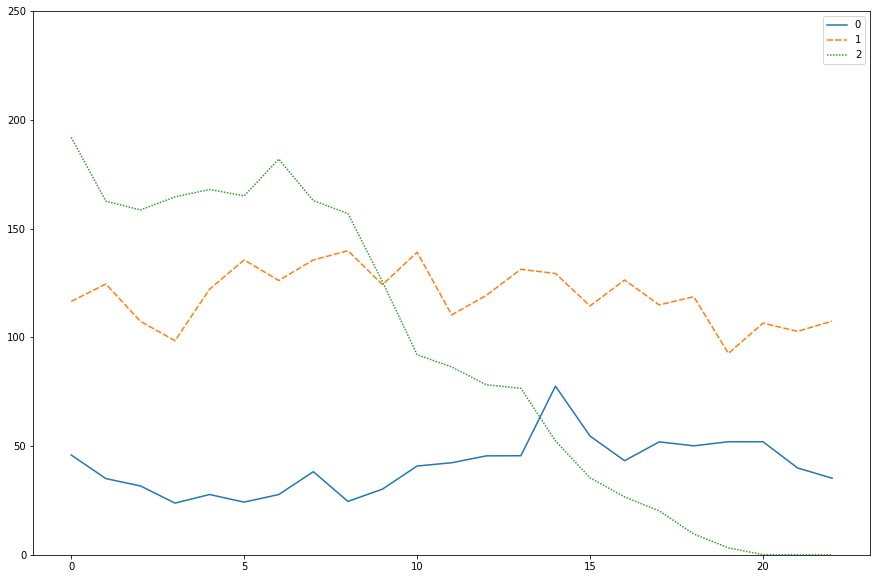

In [19]:
social_graduated_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 3).fit(vectors_social_edgesize_graduated)
df_labels_mean = pd.DataFrame(np.c_[vectors_social_edgesize_graduated, social_graduated_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_labels_mean.values.T)

In [20]:
pd.value_counts(social_graduated_clusterer.labels_)

 1    127
-1     36
 0     26
dtype: int64

<AxesSubplot:>

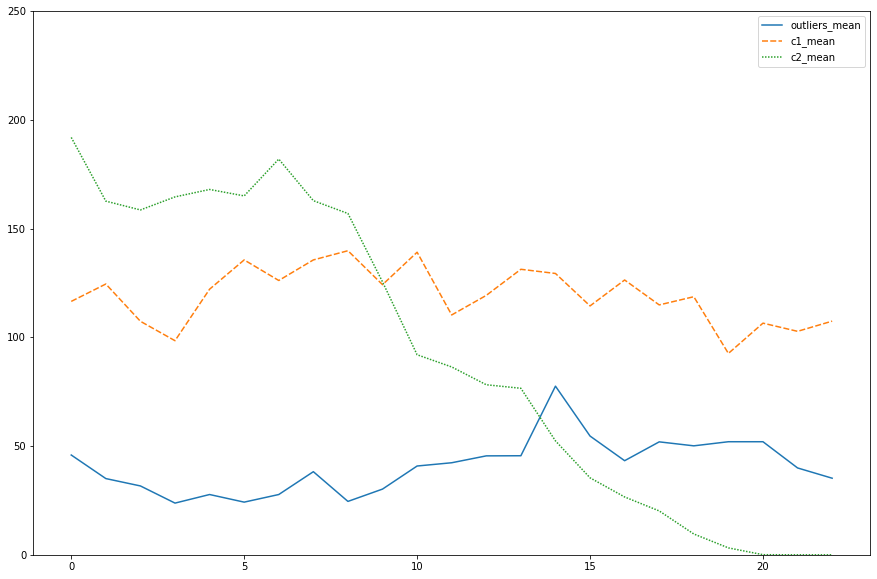

In [21]:
temp_labels_mean = df_labels_mean.T
temp_labels_mean.columns=['outliers_mean', 'c1_mean', 'c2_mean']
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= temp_labels_mean)

In [22]:
temp_labels_mean.loc[23]=[-1,0,1]

In [23]:
df_social_edgesize_graduated_labeled = pd.DataFrame(np.c_[vectors_social_edgesize_graduated, social_graduated_clusterer.labels_]).T
df_social_edgesize_graduated_labeled.columns = df_social_edgesize_graduated.T.columns
df_social_edgesize_graduated_labeled = pd.concat([df_social_edgesize_graduated_labeled.T, temp_labels_mean.T], axis=0)
#df_social_edgesize_graduated_labeled['time'] = df_social_edgesize_graduated_labeled.index
#df_social_edgesize_graduated_labeled

### Cluster 1

<AxesSubplot:>

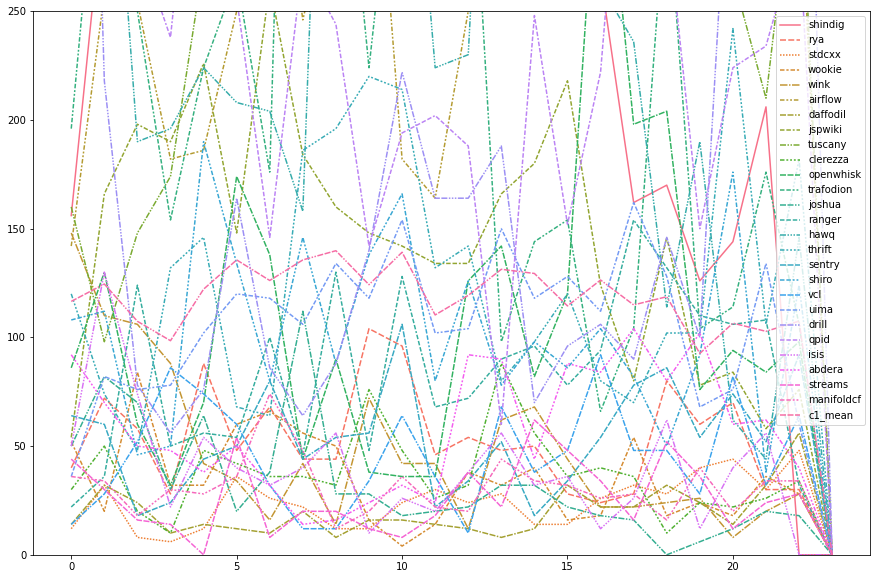

In [24]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_social_edgesize_graduated_labeled.groupby(23).get_group(0.0).T)

### Subcluster of cluster 1

In [46]:
this_group= df_social_edgesize_graduated_labeled.groupby(23).get_group(0.0)
len(this_group)

27

<AxesSubplot:>

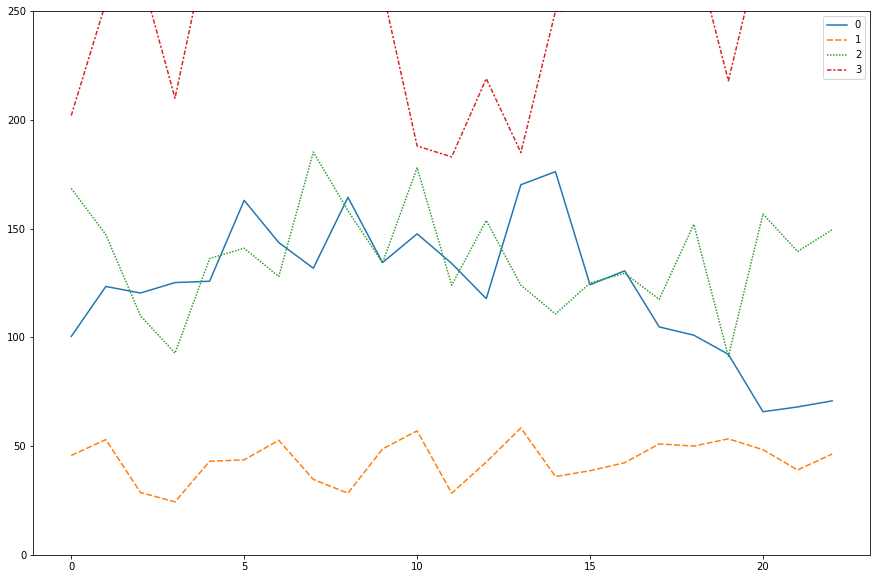

In [52]:
vectors_temp = this_group.drop(['c1_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_labels_temp.values.T)

+ XLarge > 200
+ Large > 100
+ Small < 50

In [53]:
pd.value_counts(temp_clusterer.labels_)

-1    10
 1     8
 0     6
 2     2
dtype: int64

In [54]:
df_temp_clusters = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).T
df_temp_clusters.columns = this_group.T.columns[:len(this_group.T.columns)-1]
df_temp_clusters = df_temp_clusters.T

<AxesSubplot:>

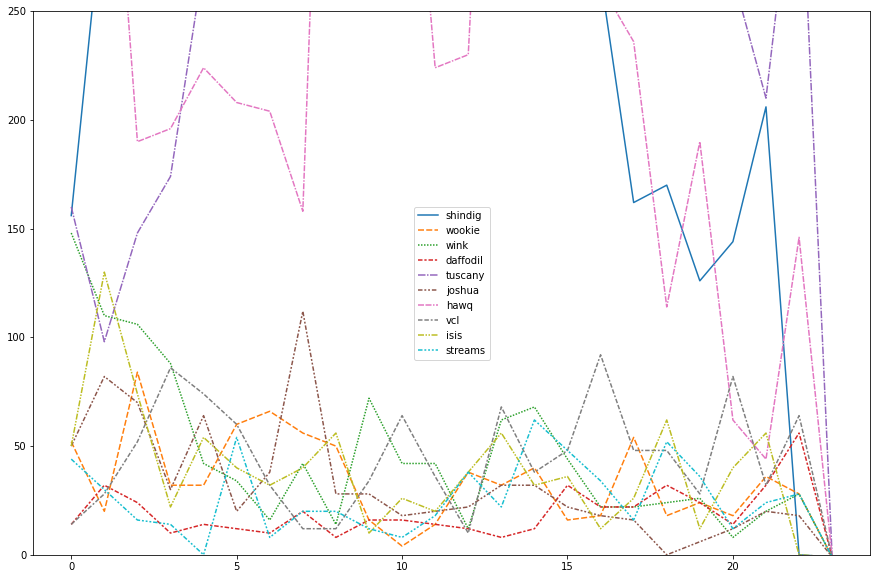

In [58]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(-1.0).T)

<AxesSubplot:>

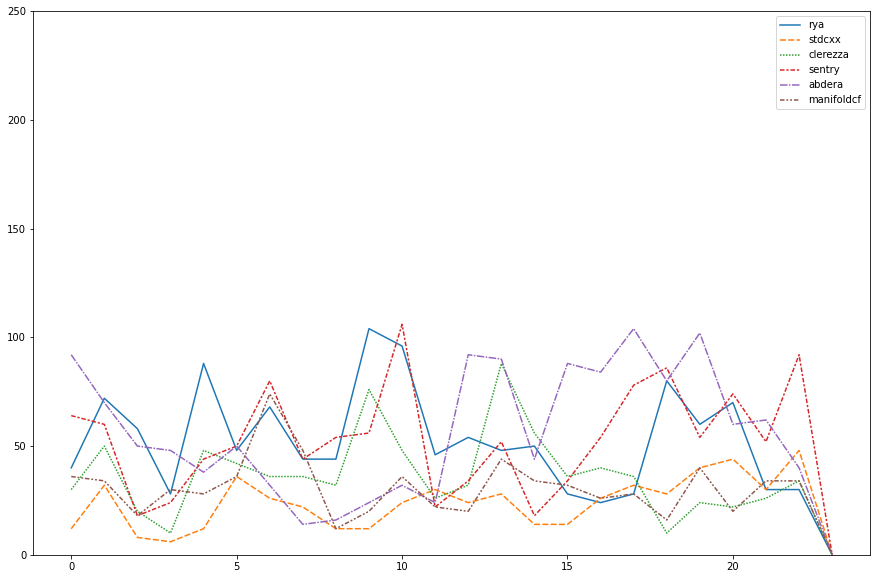

In [55]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(0.0).T)

<AxesSubplot:>

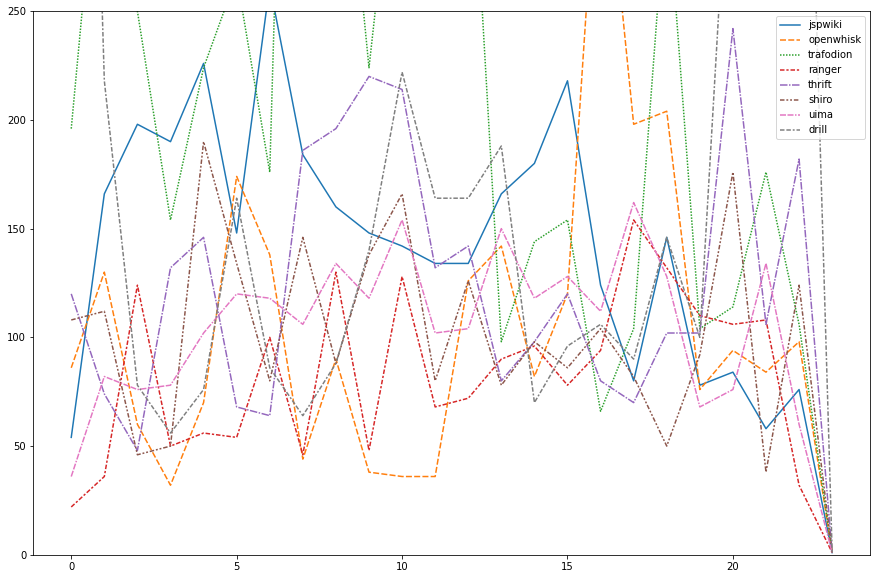

In [56]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(1.0).T)

<AxesSubplot:>

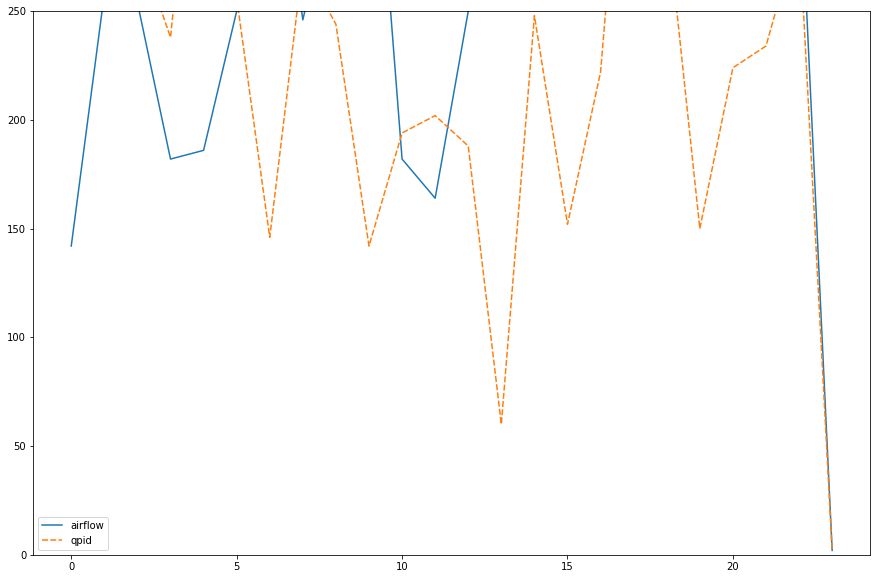

In [57]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(2.0).T)

### Cluster 1

<AxesSubplot:>

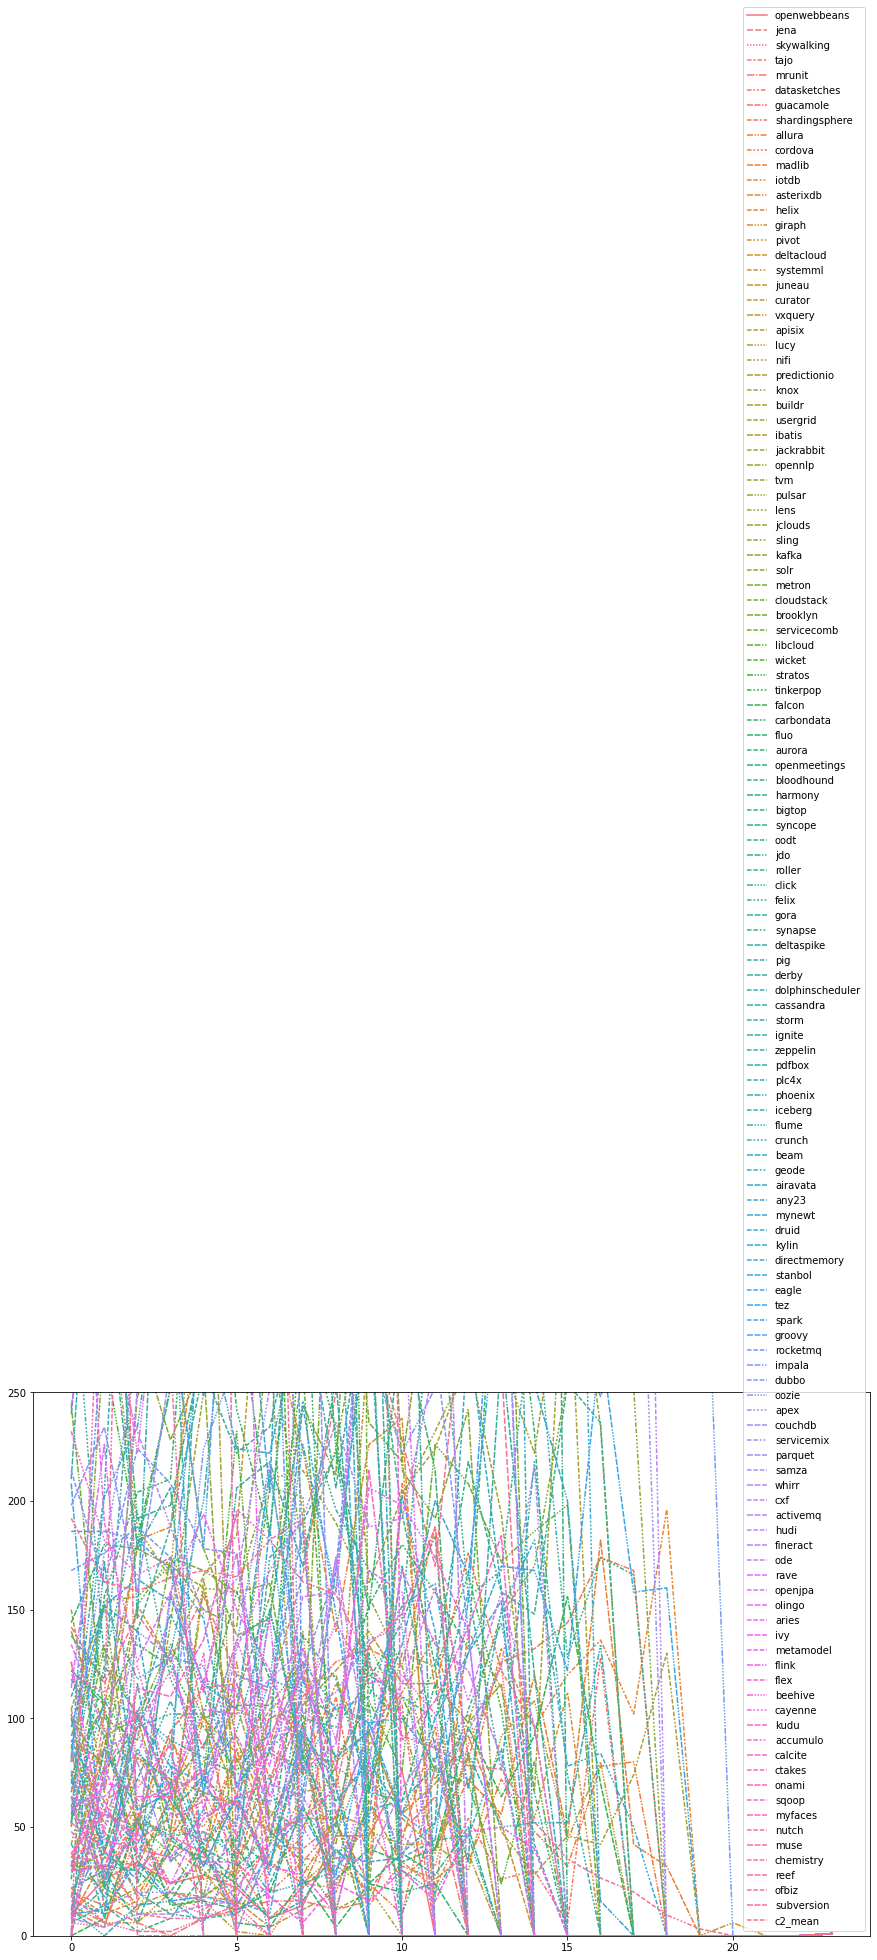

In [25]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_social_edgesize_graduated_labeled.groupby(23).get_group(1.0).T)

# Subclusters of Cluster 1

In [61]:
this_group= df_social_edgesize_graduated_labeled.groupby(23).get_group(1.0)
len(this_group)

128

<AxesSubplot:>

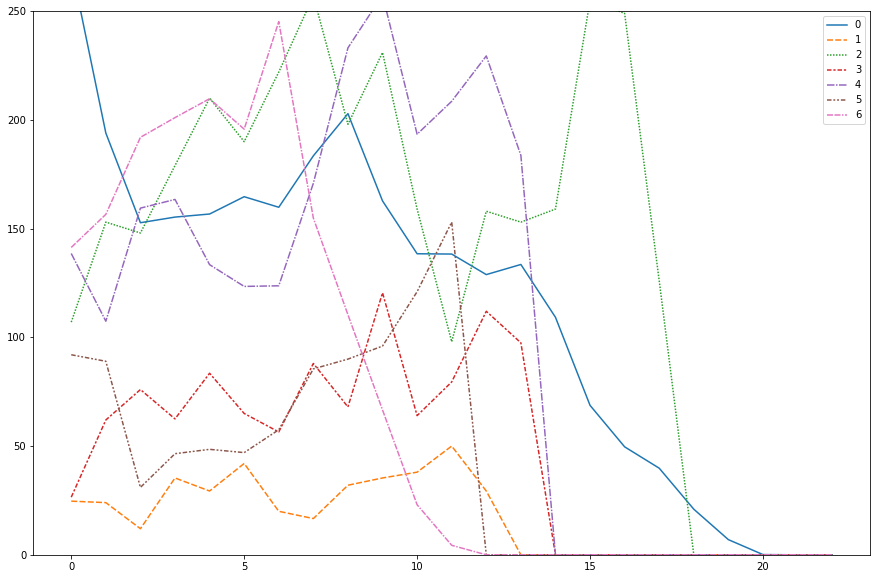

In [62]:
vectors_temp = this_group.drop(['c2_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_labels_temp.values.T)

In [63]:
pd.value_counts(temp_clusterer.labels_)

-1    58
 5    49
 3     7
 2     4
 4     4
 0     3
 1     2
dtype: int64

In [64]:
df_temp_clusters = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).T
df_temp_clusters.columns = this_group.T.columns[:len(this_group.T.columns)-1]
df_temp_clusters = df_temp_clusters.T

<AxesSubplot:>

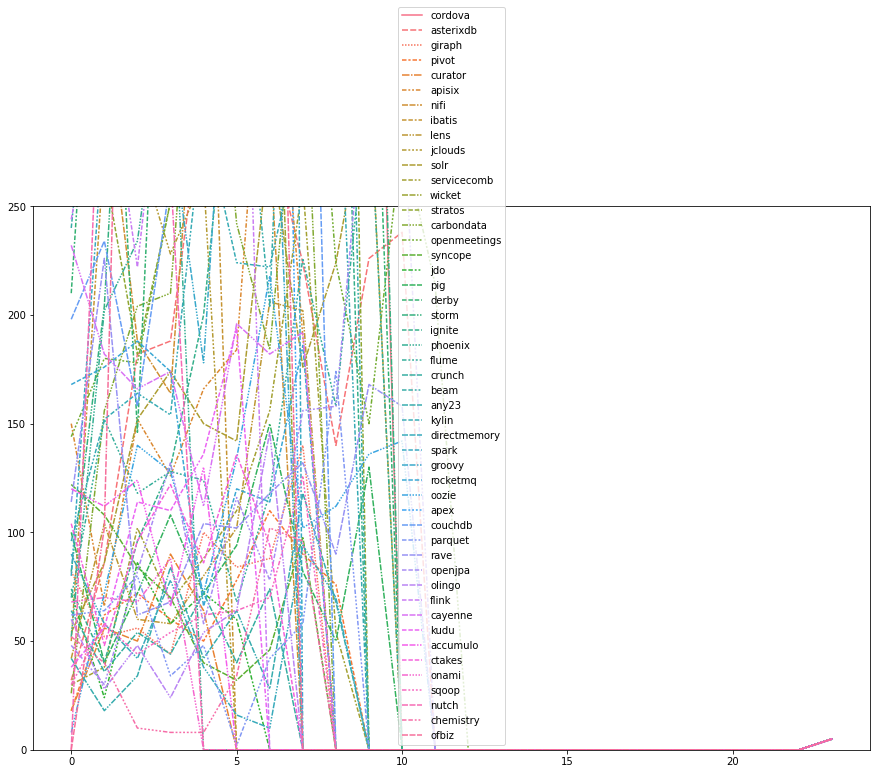

In [66]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(5.0).T)

## Outliers of the graduate group
+ Clustering second time for the outliers of graduate group

In [29]:
this_group= df_social_edgesize_graduated_labeled.groupby(23).get_group(-1.0)
len(this_group)

37

<AxesSubplot:>

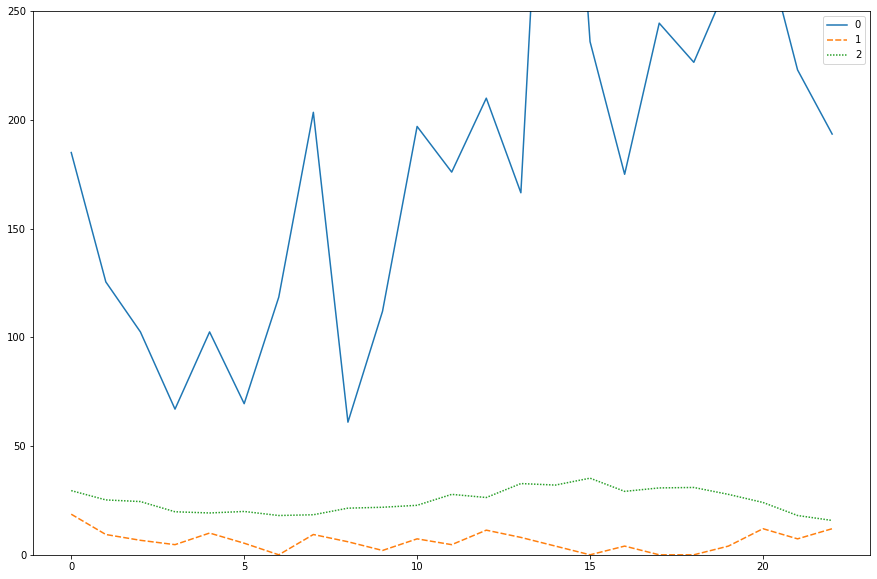

In [30]:
vectors_temp = this_group.drop(['outliers_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_labels_temp.values.T)

In [31]:
pd.value_counts(temp_clusterer.labels_)

 1    29
-1     4
 0     3
dtype: int64

In [32]:
df_labels_temp

0           1           2          3           4          5   \
23                                                                           
-1.0  185.000000  125.500000  102.500000  67.000000  102.500000  69.500000   
 0.0   18.666667    9.333333    6.666667   4.666667   10.000000   5.333333   
 1.0   29.517241   25.241379   24.482759  19.793103   19.241379  19.931034   

              6           7          8           9   ...          13  \
23                                                   ...               
-1.0  118.500000  203.500000  61.000000  112.000000  ...  166.500000   
 0.0    0.000000    9.333333   6.000000    2.000000  ...    8.000000   
 1.0   18.068966   18.413793  21.448276   21.862069  ...   32.758621   

              14          15          16          17          18          19  \
23                                                                             
-1.0  462.500000  236.000000  175.000000  244.500000  226.500000  263.500000   
 0.0    4.000000    0.000000    4.000000    0.000000    0.000000    4.000000   
 1.0   32.068966   35.241379   29.172414   30.758621   30.965517   27.793103   

              20          21          22  
23                                        
-1.0  284.500000  223.000000  193.500000  
 0.0   12.000000    7.333333   12.000000  
 1.0   24.068966   18.068966   15.793103  

[3 rows x 23 columns]

In [33]:
df_temp_clusters = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).T
df_temp_clusters.columns = this_group.T.columns[:len(this_group.T.columns)-1]
df_temp_clusters = df_temp_clusters.T

In [34]:
df_temp_clusters.groupby(23).get_group(0.0)

0     1     2    3     4     5    6     7     8    9   ...    14  \
batchee  26.0   6.0   8.0  6.0  18.0   6.0  0.0   2.0  18.0  0.0  ...  12.0   
mod_ftp  18.0   0.0   0.0  4.0   6.0  10.0  0.0   8.0   0.0  0.0  ...   0.0   
omid     12.0  22.0  12.0  4.0   6.0   0.0  0.0  18.0   0.0  6.0  ...   0.0   

          15    16   17   18   19    20    21    22   23  
batchee  0.0  12.0  0.0  0.0  8.0  18.0  16.0  24.0  0.0  
mod_ftp  0.0   0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0  
omid     0.0   0.0  0.0  0.0  4.0  18.0   6.0  12.0  0.0  

[3 rows x 24 columns]

<AxesSubplot:>

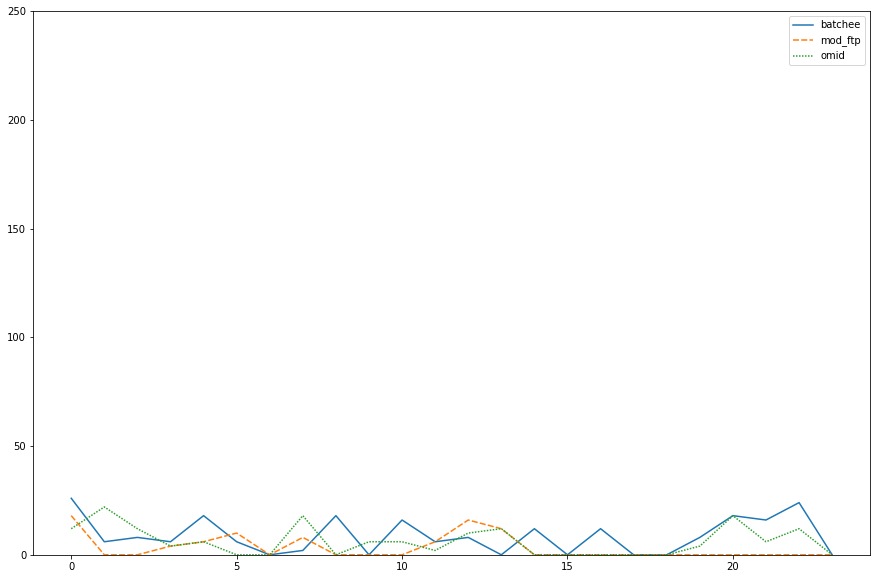

In [35]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(0.0).T)

<AxesSubplot:>

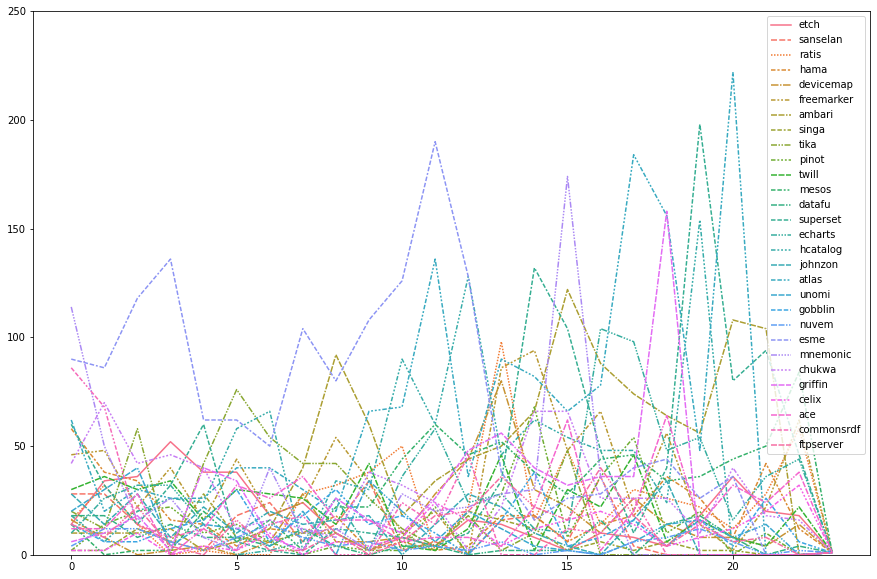

In [36]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(1.0).T)

<AxesSubplot:>

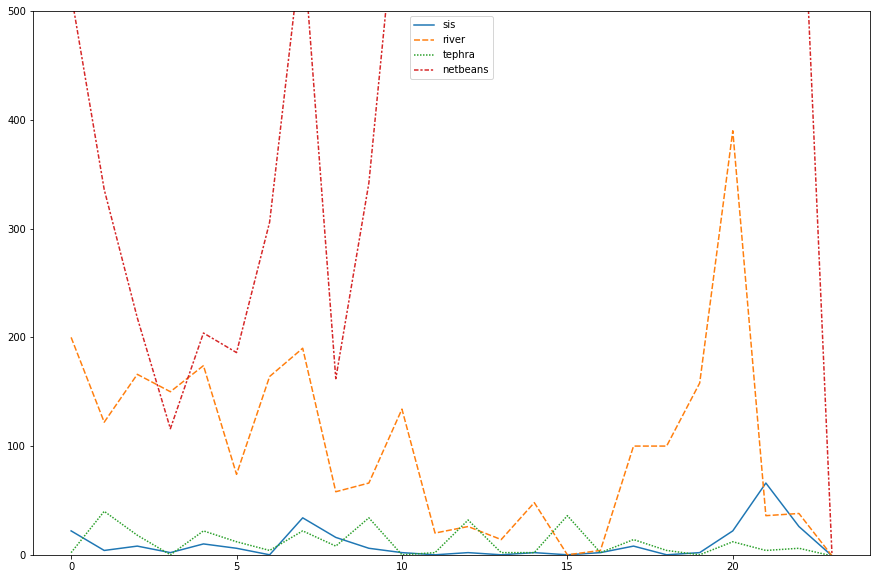

In [37]:
plt.figure(figsize=(15, 10))
plt.ylim(0,500)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(-1.0).T)

# Clustering of Retired Group

<AxesSubplot:>

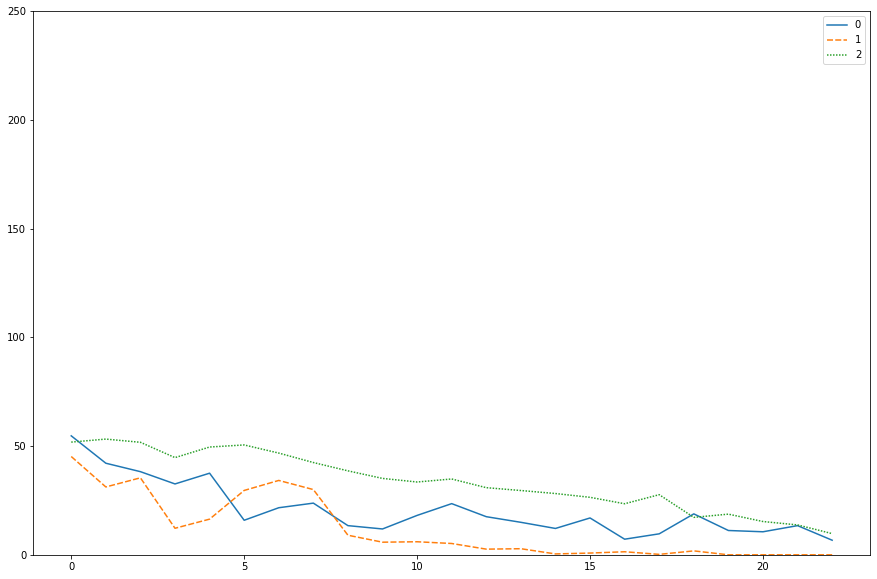

In [38]:
social_retired_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 3).fit(vectors_social_edgesize_retired)
df_labels_mean = pd.DataFrame(np.c_[vectors_social_edgesize_retired, social_retired_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_labels_mean.values.T)

In [39]:
pd.value_counts(social_retired_clusterer.labels_)

 1    23
-1    17
 0    10
dtype: int64

<AxesSubplot:>

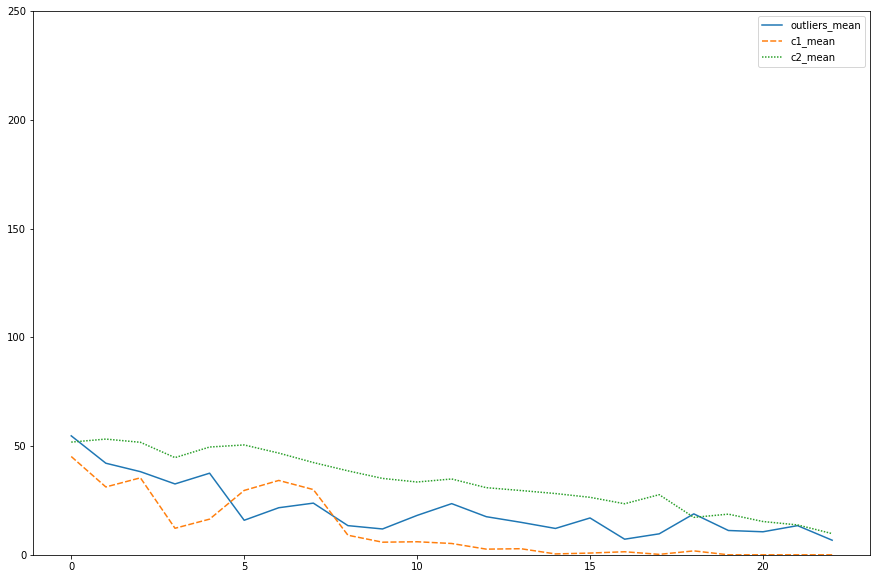

In [40]:
temp_labels_mean = df_labels_mean.T
temp_labels_mean.columns=['outliers_mean', 'c1_mean', 'c2_mean']
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= temp_labels_mean)

In [41]:
temp_labels_mean.loc[23]=[-1,0,1]

In [42]:
df_social_edgesize_retired_labeled = pd.DataFrame(np.c_[vectors_social_edgesize_retired, social_retired_clusterer.labels_]).T
df_social_edgesize_retired_labeled.columns = df_social_edgesize_retired.T.columns
df_social_edgesize_retired_labeled = pd.concat([df_social_edgesize_retired_labeled.T, temp_labels_mean.T], axis=0)
#df_social_edgesize_retired_labeled['time'] = df_social_edgesize_retired_labeled.index
#df_social_edgesize_retired_labeled

<AxesSubplot:>

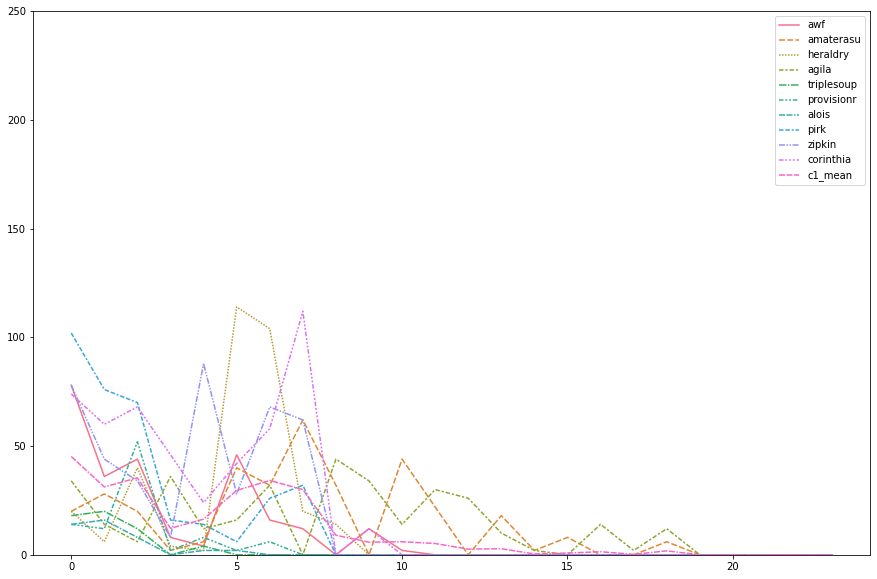

In [44]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_social_edgesize_retired_labeled.groupby(23).get_group(0.0).T)


<AxesSubplot:>

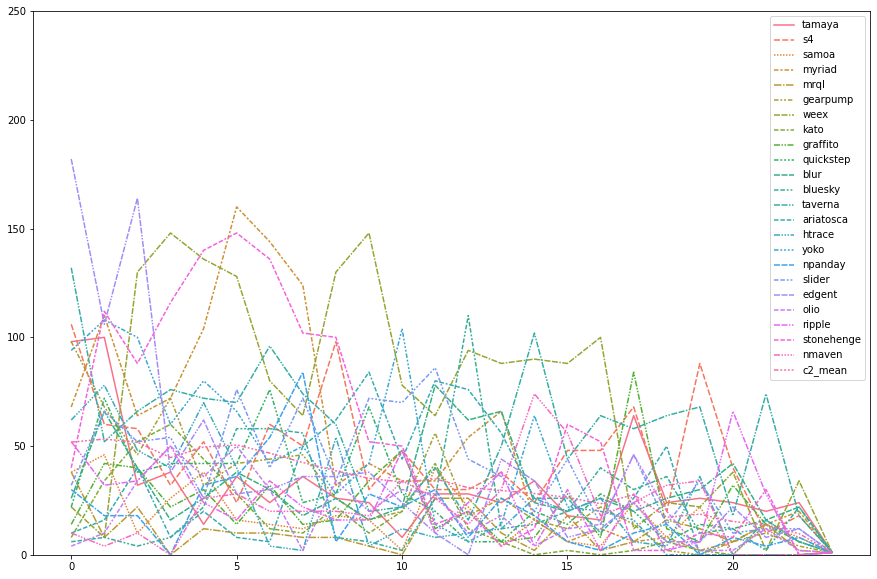

In [45]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_social_edgesize_retired_labeled.groupby(23).get_group(1.0).T)


<AxesSubplot:>

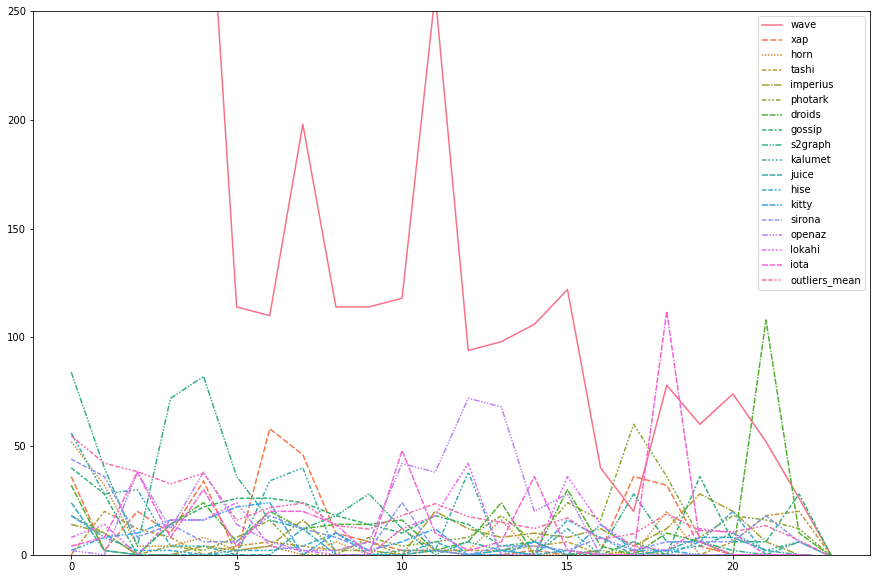

In [43]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_social_edgesize_retired_labeled.groupby(23).get_group(-1.0).T)


## Outliers of the retired group
+ Clustering second time for the outliers of retired group

In [67]:
this_group= df_social_edgesize_graduated_labeled.groupby(23).get_group(-1.0)
len(this_group)

37

<AxesSubplot:>

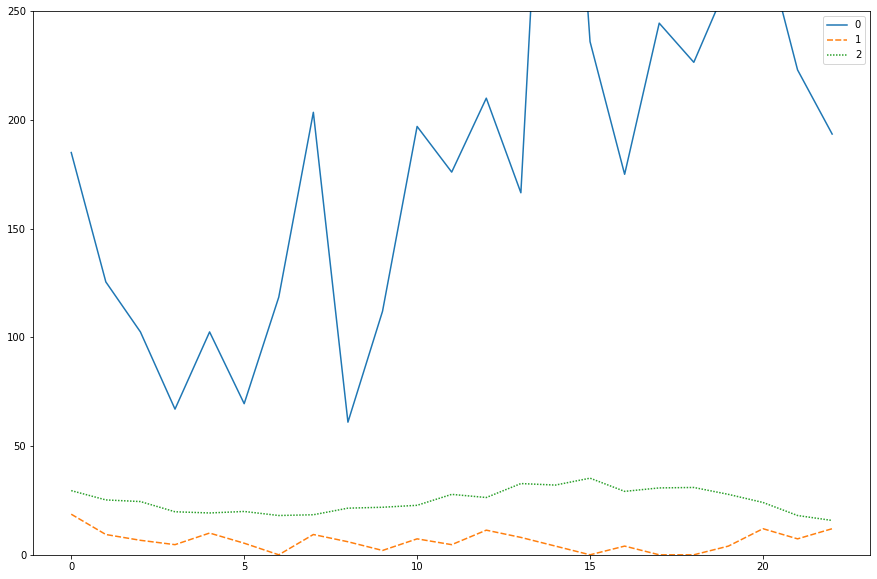

In [68]:
vectors_temp = this_group.drop(['outliers_mean'])[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_labels_temp.values.T)

In [78]:
pd.value_counts(temp_clusterer.labels_)

 1    29
-1     4
 0     3
dtype: int64

In [72]:
df_temp_clusters = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).T
df_temp_clusters.columns = this_group.T.columns[:len(this_group.T.columns)-1]
df_temp_clusters = df_temp_clusters.T

<AxesSubplot:>

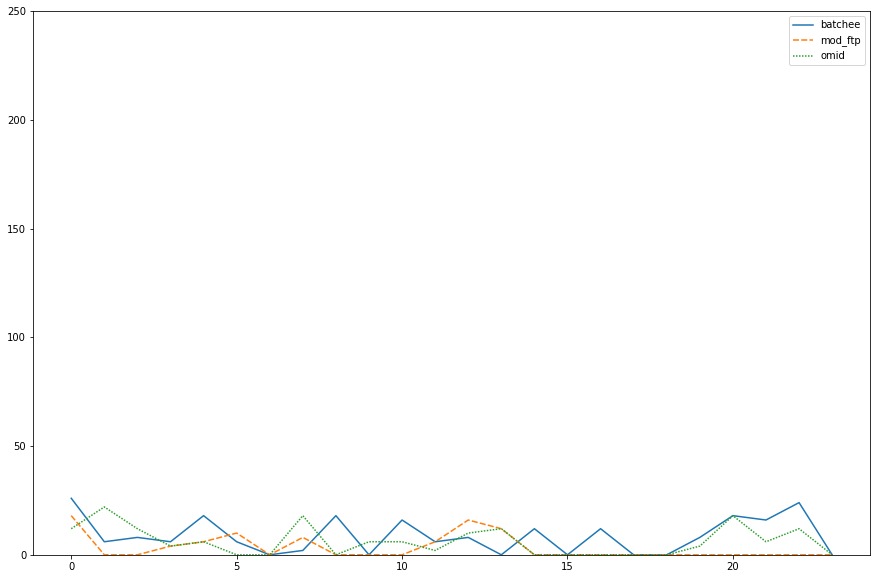

In [76]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(0.0).T)

<AxesSubplot:>

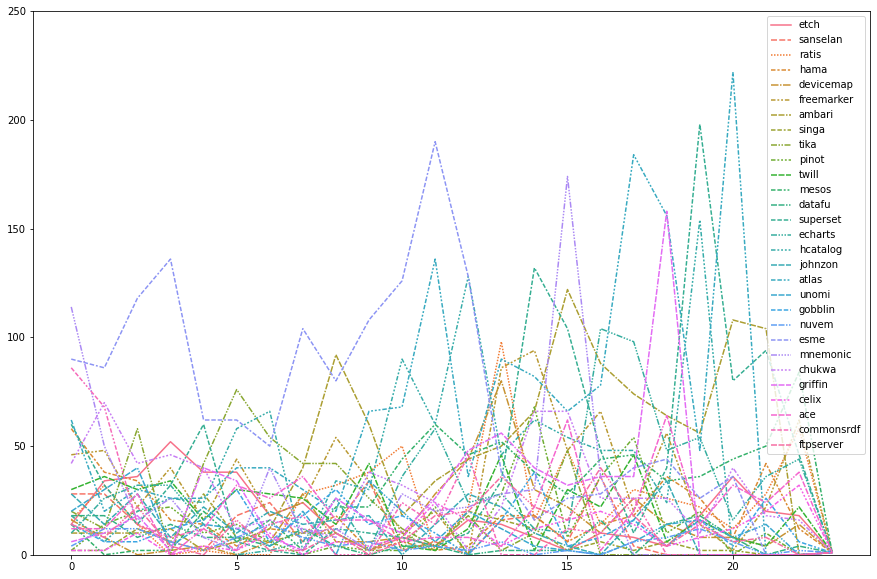

In [77]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_temp_clusters.groupby(23).get_group(1.0).T)

### Third Level Clustering

In [83]:
this_group= df_temp_clusters.groupby(23).get_group(1.0)
len(this_group)

29

<AxesSubplot:>

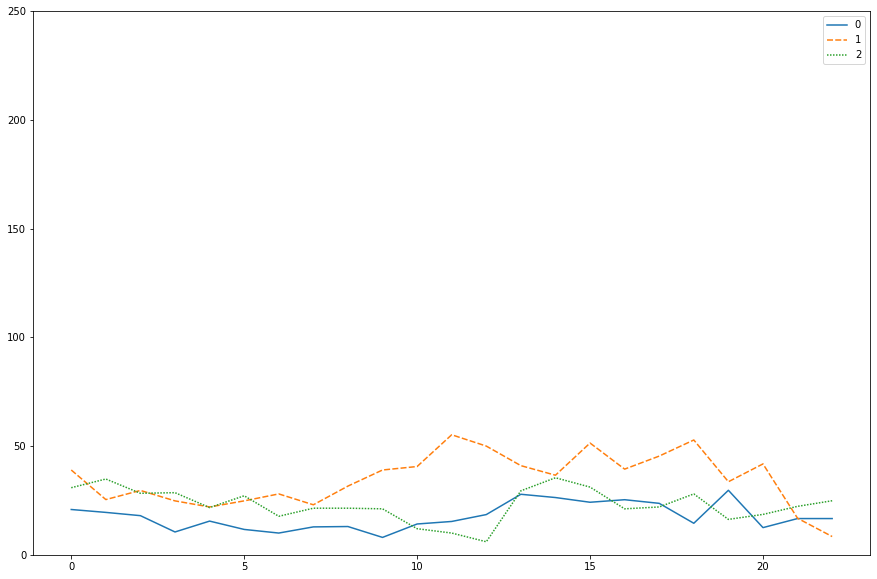

In [85]:
vectors_temp = this_group[range(23)].values
temp_clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='canberra',  min_cluster_size= 2).fit(vectors_temp)
df_labels_temp = pd.DataFrame(np.c_[vectors_temp, temp_clusterer.labels_]).groupby(23).agg('mean')
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_labels_temp.values.T)

In [86]:
pd.value_counts(temp_clusterer.labels_)

-1    12
 0    10
 1     7
dtype: int64